In [4]:
from datetime import datetime
from pytz import UTC
#hd,  8297,2022,03,01,07,22,   0.0,Y,   1,#
with open('./rain_data/HD01D_Data_008297_9999999910795325.txt','rb') as f:
    all = f.read()

lines = all.decode().splitlines()
times = []
data = []
for i, line in enumerate(lines[1:2]):
    print(line.split(','))
for i, line in enumerate(lines[1:]):
    mm = line.split(',')[7].strip()
    t = line.split(',')[9].strip()
    if (not (mm == "")) and t == '1':
        year = line.split(',')[2].strip()
        month = line.split(',')[3].strip()
        day = line.split(',')[4].strip()
        hour = line.split(',')[5].strip()
        minute =  line.split(',')[6].strip()
        dt = year+'-'+month+'-'+day+'T'+hour+':'+minute+':00'
        dt = datetime(int(year), int(month), int(day), int(hour), int(minute), 0).astimezone(UTC)
        times.append(dt.timestamp())
        fl = float(mm)
        data.append(fl)
print((len(data)/len(lines)))
import numpy as np
data = np.array(data)
times = np.array(times)

['hd', '  8297', '2022', '03', '01', '00', '00', '   0.0', 'Y', '   1', '#']
0.9941248699056637


4.6


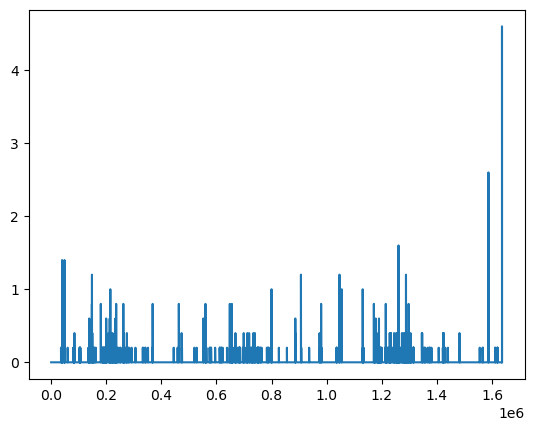

In [30]:
import matplotlib.pyplot as plt
plt.step(range(len(data)),data)
print(np.max(data))
plt.show()

(1636251,)
(2, 2784)
i: 1648237740.0 to 1648237800.0: 60.0s
i: 1648237860.0 to 1648237920.0: 60.0s
(2784,)
[  60.    79.2   98.4  117.6  136.8  156.   175.2  194.4  213.6  232.8
  252.   271.2  290.4  309.6  328.8  348.   367.2  386.4  405.6  424.8
  444.   463.2  482.4  501.6  520.8  540.   559.2  578.4  597.6  616.8
  636.   655.2  674.4  693.6  712.8  732.   751.2  770.4  789.6  808.8
  828.   847.2  866.4  885.6  904.8  924.   943.2  962.4  981.6 1000.8
 1020.  1039.2 1058.4 1077.6 1096.8 1116.  1135.2 1154.4 1173.6 1192.8
 1212.  1231.2 1250.4 1269.6 1288.8 1308.  1327.2 1346.4 1365.6 1384.8
 1404.  1423.2 1442.4 1461.6 1480.8 1500.  1519.2 1538.4 1557.6 1576.8
 1596.  1615.2 1634.4 1653.6 1672.8 1692.  1711.2 1730.4 1749.6 1768.8
 1788.  1807.2 1826.4 1845.6 1864.8 1884.  1903.2 1922.4 1941.6 1960.8]
[0.88362069 0.88362069 0.88362069 0.94791667 0.94791667 0.94791667
 0.96659483 0.96659483 0.96659483 0.97701149 0.97701149 0.97701149
 0.98635057 0.98635057 0.98635057 0.99030172 0.9

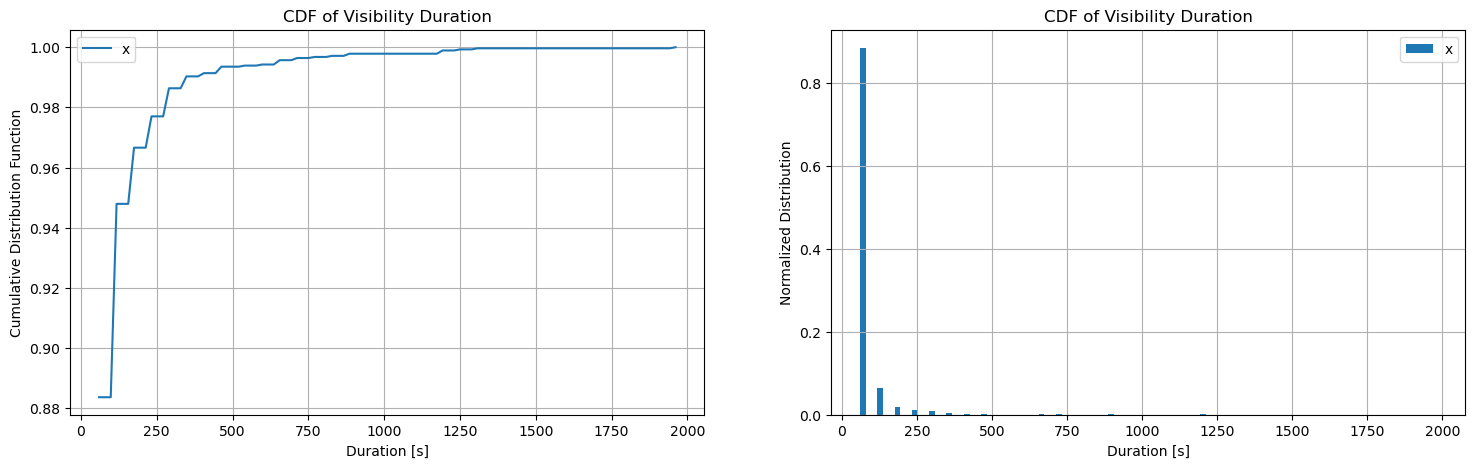

78.34051724137932


In [47]:
from mani.utils import get_view_times_spans
import pandas as pd

def get_view_time_lengths(view_time_span) -> np.ndarray:
    arr = view_time_span[1,:] - view_time_span[0,:]
    return np.array(arr)


df = pd.DataFrame({'time':times, 'mm':data})
print(data.shape)
spans = get_view_times_spans(df['time'], (df['mm'] > 0.0))
print(spans.shape)

for i in range(len(spans)):
    print(f"i: {spans[0,i]} to {spans[1,i]}: {spans[1,i] - spans[0,i]}s")

lengths = get_view_time_lengths(spans)
print(lengths.shape)

def plot_cdf(ax, bins,vals, name):
    ax.plot(bins[:-1], np.cumsum(vals), label = name)
    ax.grid()
    ax.set_xlabel('Duration [s]')
    ax.set_ylabel('Cumulative Distribution Function')
    ax.legend()
    ax.set_title('CDF of Visibility Duration')

def plot_hist(ax, arr, name):
    ax.hist(arr, bins = 100, weights=np.ones(len(arr)) / len(arr), label = name)
    ax.grid()
    ax.set_xlabel('Duration [s]')
    ax.set_ylabel('Normalized Distribution')
    ax.set_title('CDF of Visibility Duration')
    ax.legend()


fig = plt.figure(figsize = (18,5))
ax0, ax1 = fig.subplots(1,2)
arr = lengths
name = 'x'
vals, bins = np.histogram(arr, bins=100, weights=np.ones(len(arr)) / len(arr))
plot_cdf(ax0, bins, vals, name)
print(bins[:-1])
print(np.cumsum(vals))

plot_hist(ax1, arr, name)

# plot_times(ax2, res['time'], condition, name)

plt.show()

print(np.mean(lengths))